# Calculus

In `sage02_polynomials` we saw that we could build polynomials from symbolic expressions.

That is, we used `x = var('x')`.

We can build more general symbolic expressions this way.

In [3]:
pretty_print_default(True)

We'll define two variables `x` and `y` but work with only one for now.

In [10]:
x, y = var('x,y')
f = x + e^(x^2-1) + sin(x - pi/4)
f

x + e^(x^2 - 1) + sin(-1/4*pi + x)

As we saw in the introduction, we can differentiate and integrate.

In [11]:
f.derivative()

2*x*e^(x^2 - 1) + cos(-1/4*pi + x) + 1

We can plot in the usual way.

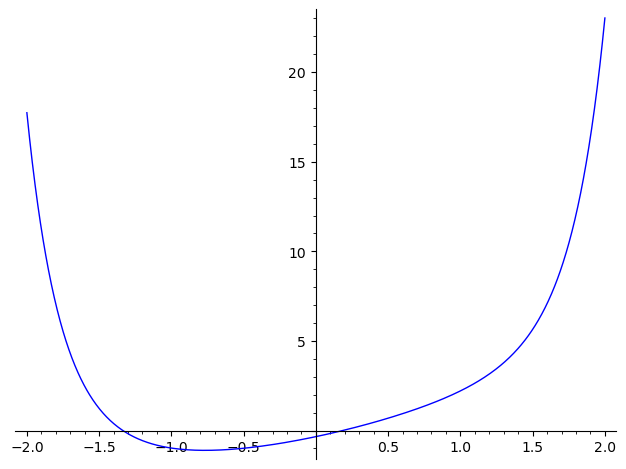

In [14]:
f.plot(-2, 2)

We can find roots with `find_root`. 

Sometimes we can take advantage of `f.roots()`, but for complicated functions, this won't work.

In [20]:
# f.roots()                # Won't work

From the graph, we see there is a root in the interval: 
- $(-1.5, -1.0)$
- $(0.0, 0.5)$.

In [23]:
print(f"We have two roots at approximately:\n\t{find_root(f, -1.5, -1)}\n\t{find_root(f, 0, 0.5)}")

We have two roots at approximately:
	-1.3352612783905422
	0.18463524443735707


Sanity check! 

In [24]:
z = find_root(f, 0, 0.5)
f(x=z)

sin(-1/4*pi + 0.18463524443735707) + 0.5652719731992542

In [30]:
float(f(x=z))

0.0

## Univariate integration

We can integrate, both compute the antiderivative and integrate over an interval.

In [33]:
f.integral(x)

-1/2*I*sqrt(pi)*erf(I*x)*e^(-1) + 1/2*x^2 - cos(-1/4*pi + x)

Notice the function $e^{x^2-1}$ produces a strange looking function in the integral.

We'll come back to this soon.

We can numerically integrate over an interval. 

Since our function `f` is defined everywhere, let's pick the interval $(0.5,1)$.

In [36]:
f.integrate(x, 0.5, 1)

-0.5*(-2.0*cos(0.25*pi - 0.5)*e + 2.0*cos(0.25*pi - 1.0)*e + sqrt(pi)*(1.0*I*erf(I) + 0.614952094696511) - 0.75*e)*e^(-1)

😕

In [37]:
float(f.integrate(x, 0.5, 1))

0.6950783216653694

😌

The way I would integrate the function $e^{x^2-1}$ is to write it as its Taylor series. Namely,
$$
    e^{x^2-1} = \frac{1}{e}\sum_{k=0}^{\infty} \dfrac{x^{2k}}{k!}.
$$

Thus, an antiderivative of $e^{x^2-1}$ is 
$$
    \frac{1}{e}\sum_{k=0}^{\infty} \dfrac{x^{2k+1}}{k! (2k+1)}
$$

which isn't a simple function of the form $e^{g(x)}$.

Let's plug this directly into SageMath.

In [43]:
k = var('k')
sum(x^(2*k+1)/(factorial(k)*(2*k+1)), k, 0, Infinity)

-1/2*I*sqrt(pi)*x*erf(I*sqrt(x^2))/sqrt(x^2)

Thus, the mysterious function we got when computing an antiderivative is really just another way of writing the integral of the Taylor series.

## Series

We can compute Taylor series approximations.

Here is the constant term of our function `f` from above.

That is, it is the Taylor expansion about $x=0$ and it is the constant term of the power series.

In [56]:
f.taylor(x, 0, 0)

-1/2*(sqrt(2)*e - 2)*e^(-1)

We can plot a few Taylor approximations of our function `f`.

We can plot multiple curves by plot a list of curves.

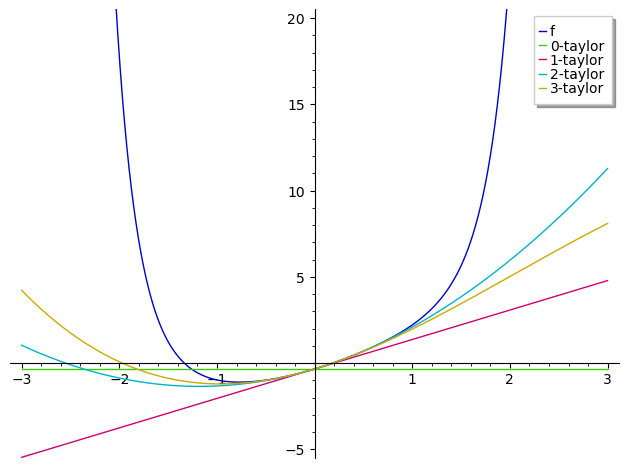

In [74]:
N = 4
curves = [f] + [f.taylor(x, 0, k) for k in range(N)]
labels = ['f'] + [f'{k}-taylor' for k in range(N)]

plot(curves, xmin=-3, xmax=3, legend_label=labels, ymin=-5, ymax=20)

We can also compute value of series.

A long time ago, Euler showed that 
$$
    \sum_{k=1}^\infty \dfrac{1}{k^2} = \dfrac{\pi^2}{6}.
$$

In [80]:
sum(1/k^2, k, 1, Infinity)                      # Try other positive even integers instead of 2

1/6*pi^2

## Multivariate calculus

The difference from $2$ variables to $n$ is mostly just bookkeeping, so I'll just discuss $2$ variables.

We can use the `derivative` method to take partial derivatives.

In [83]:
f = x + y - e^(x^2 + y^2)
f

x + y - e^(x^2 + y^2)

In [84]:
f.derivative(x)

-2*x*e^(x^2 + y^2) + 1

In [85]:
f.derivative(y)

-2*y*e^(x^2 + y^2) + 1

In [89]:
f.gradient()

(-2*x*e^(x^2 + y^2) + 1, -2*y*e^(x^2 + y^2) + 1)

Like in the univariate setting, we can plot, but we need to do something else.

For multivariate functions, `plot` does not work.

In [105]:
plot3d(f, [-1, 1], [-1, 1], frame=True)                      # frame default is True

Graphics3d Object

In [110]:
f.integral(x).integral(y)

1/2*x^2*y + 1/2*x*y^2 + 1/4*pi*erf(I*x)*erf(I*y)

### Vector fields

We can work with vector fields in SageMath and plot them.

In [150]:
F(x,y) = (-x, y)
F

(x, y) |--> (-x, y)

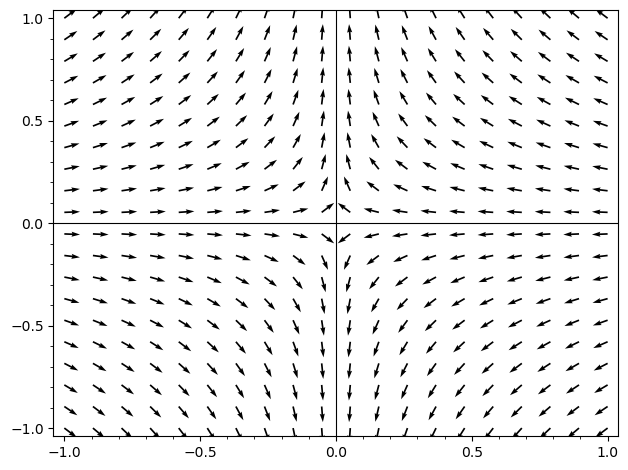

In [151]:
plot_vector_field(F/F.norm(), (x, -1, 1), (y, -1, 1))

In [152]:
F(x, y) = (y,(cos(x)-2) * sin(x))
F

(x, y) |--> (y, (cos(x) - 2)*sin(x))

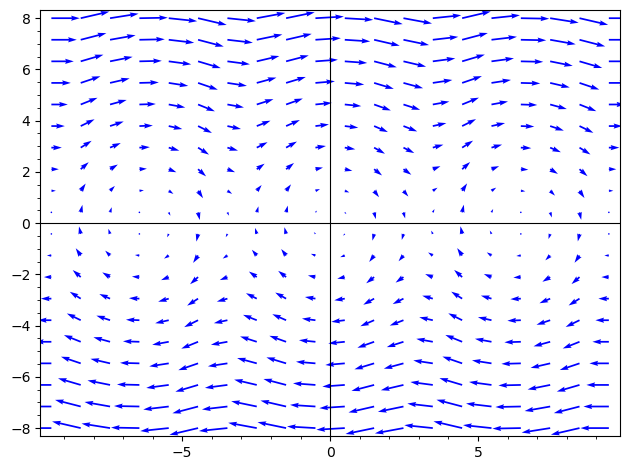

In [154]:
plot_vector_field(F, (x, -3*pi, 3*pi), (y, -8, 8), color='blue')

## Exercises

1. Construct a symbolic expression in the variable `'t'` including exponents, cosine, $e$, $\pi$, and $\ln$ (SageMath writes this as `log`).
2. Plot the function from (1). Choose parameters so that the (viewing) window is reasonable.
2. Take at least 2 derivatives of the function from (1), compute an antiderivative, and numerically integrate it over a reasonable interval.
2. Play around with some of the other objects we've discussed as well. 